# Plot Word Cloud from Twitter Dataset

The dataset is from [here](https://zenodo.org/record/835735)


The German stopwords are downloaded from the package [nltk](https://www.nltk.org/api/nltk.html).
How to download the German stopwords:

1. install nltk: `pip install nltk`
2. `import nltk`
3. `nltk.download('stopwords')`

The package should be downloaded in: `C:\Users\...\AppData\Roaming\nltk_data\corpora`

In [1]:
from pathlib import Path
# import os
# import json
from nltk.corpus import stopwords
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle

# Load files

In [2]:
path = Path('data', 'all_tweets')
with open(path, "rb") as fp:
    all_tweets = pickle.load(fp)

In [3]:
path = Path('data', 'all_hashtags')
with open(path, "rb") as fp:
    all_hashtags = pickle.load(fp)

# WordCloud

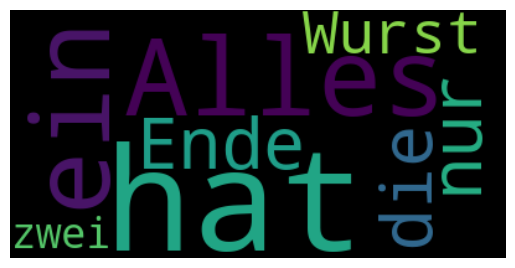

In [4]:
text = "Alles hat ein Ende nur die Wurst hat zwei"

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Plot the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Stop words

In [5]:
german_stop_words = stopwords.words('german')

In [6]:
print(f"Lenght: {len(german_stop_words)}")
print(f"\nFirst 10 words: {german_stop_words[:10]}")

Lenght: 232

First 10 words: ['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']


In [7]:
df = pd.DataFrame(
    ["Das ist ein Test", "Wie geht es dir?", "Wie geht's dir?",  "Alles hat ein Ende nur die Wurst hat zwei", "Funf+eins=Sechs"],
    columns = ['Original']) 
df

,Original
0,Das ist ein Test
1,Wie geht es dir?
2,Wie geht's dir?
3,Alles hat ein Ende nur die Wurst hat zwei
4,Funf+eins=Sechs


Funtions to remove the stopwords from a text

In [8]:
def stop_word_removal(twitter_list):
    # Convert to lowcase letters
    text_lowcase = [word.lower() for word in twitter_list]

    # convert all non letter characters to space
    text_only_letters = [re.sub('[^a-zA-ZüöäÜÖÄ]', ' ', tweet) for tweet in text_lowcase]

    # convert multiple spaces with single space
    text_one_space = [re.sub('\s+', ' ', tweet) for tweet in text_only_letters]

    # split tweets into list of strings (each string is a word)
    token = [i.split(' ') for i in text_one_space]

    twitter_without_stopword = []
    for sentence in token:
        # remove all stop words
        twitter_without_stopword.append(' '.join(word for word in sentence if not word in german_stop_words))
    
    return twitter_without_stopword

In [9]:
# Test the function
df['no_stopwords']  = stop_word_removal(df["Original"])
df

,Original,no_stopwords
0,Das ist ein Test,test
1,Wie geht es dir?,geht
2,Wie geht's dir?,geht s
3,Alles hat ein Ende nur die Wurst hat zwei,ende wurst zwei
4,Funf+eins=Sechs,funf eins sechs


# Clean Tweets

In [10]:
print(f"Length all_tweets: {len(all_tweets)}")
print(f"Length all_tweets[0]: {len(all_tweets[0])}")
print(f"Length all_hashtags: {len(all_hashtags)}")
print(f"Length all_hashtags[0]: {len(all_hashtags[0])}")

Length all_tweets: 1310
Length all_tweets[0]: 1000
Length all_hashtags: 1310
Length all_hashtags[0]: 1000


In [11]:
all_tweets[0][:10]

['@kahrs 👍🏻 Herzliche Glückwünsche aus dem #Westerwald',
 '@peteraltmaier Bitte nicht vergessen dem mauligen Verlierer @MartinSchulz einen Platz im EU-PARLAMENT anzubieten ... das passt perfekt!',
 'RT @SWagenknecht: Rentnerin soll wegen Flaschensammeln 2000 Euro Strafe zahlen. Das Land, in dem "wir gut &amp; gerne leben" (CDU)?… ',
 '@MartinSchulz ❤️',
 '@UlrichKelber Herzliche Glückwünsche aus dem #Westerwald, lieber Uli!!',
 '@PetraPauMaHe @dielinkeberlin @DIE_LINKE_MaHe @dieLinke Herzlichen Glückwunsch, liebe @PetraPauMaHe. Das freut mich… https://t.co/cth2tKRCpi',
 '@Die_Gruenen @GoeringEckardt Samstag hat die AfD uns Pädophil genannt. Wir haben das ignoriert und Ruhe war.',
 '@AfD Na, spürt ihr es auch? Wir schützen unsere Demokratie mit allen Mitteln, die sie zur Verfügung stellt!\nDenk dich frei, #AfD Wähler!',
 'RT @FraukePetry: 👍👍👍Direktmandat im Wahlkreis #SOE für die #AfD gewonnen:\nDanke für dieses überragende Ergebnis!\n#AfD #Btw17 #TrauDichDeuts…',
 'RT @Die_Gruenen: Es 

In [12]:
def transform_tweets():
    tweets = []
    all_tweets_len = len(all_tweets)
    for i1 in range(all_tweets_len):
        if (i1 % 50) == 0:
            print(f"working {i1} of {all_tweets_len}")
        tweets_tmp = []
        tweets_tmp = stop_word_removal(all_tweets[i1])
        tweets.append(tweets_tmp)
    return(tweets)


The following cell takes about 1 minute

In [13]:
tweets = transform_tweets()

working 0 of 1310
working 50 of 1310
working 100 of 1310
working 150 of 1310
working 200 of 1310
working 250 of 1310
working 300 of 1310
working 350 of 1310
working 400 of 1310
working 450 of 1310
working 500 of 1310
working 550 of 1310
working 600 of 1310
working 650 of 1310
working 700 of 1310
working 750 of 1310
working 800 of 1310
working 850 of 1310
working 900 of 1310
working 950 of 1310
working 1000 of 1310
working 1050 of 1310
working 1100 of 1310
working 1150 of 1310
working 1200 of 1310
working 1250 of 1310
working 1300 of 1310


In [14]:
print(f"Length all_tweets: {len(tweets)}")
print(f"Length all_tweets[0]: {len(tweets[0])}")

Length all_tweets: 1310
Length all_tweets[0]: 1000


In [15]:
tweets[0][:3]

[' kahrs herzliche glückwünsche westerwald',
 ' peteraltmaier bitte vergessen mauligen verlierer martinschulz platz eu parlament anzubieten passt perfekt ',
 'rt swagenknecht rentnerin wegen flaschensammeln euro strafe zahlen land gut amp gerne leben cdu ']

In [16]:
words_list = ""
for tweet_group in range(len(tweets)):
    words_list += ' '.join(x for x in tweets[tweet_group])

In [17]:
len(words_list)

101163440

In [18]:
words_list[:100]

' kahrs herzliche glückwünsche westerwald  peteraltmaier bitte vergessen mauligen verlierer martinsch'

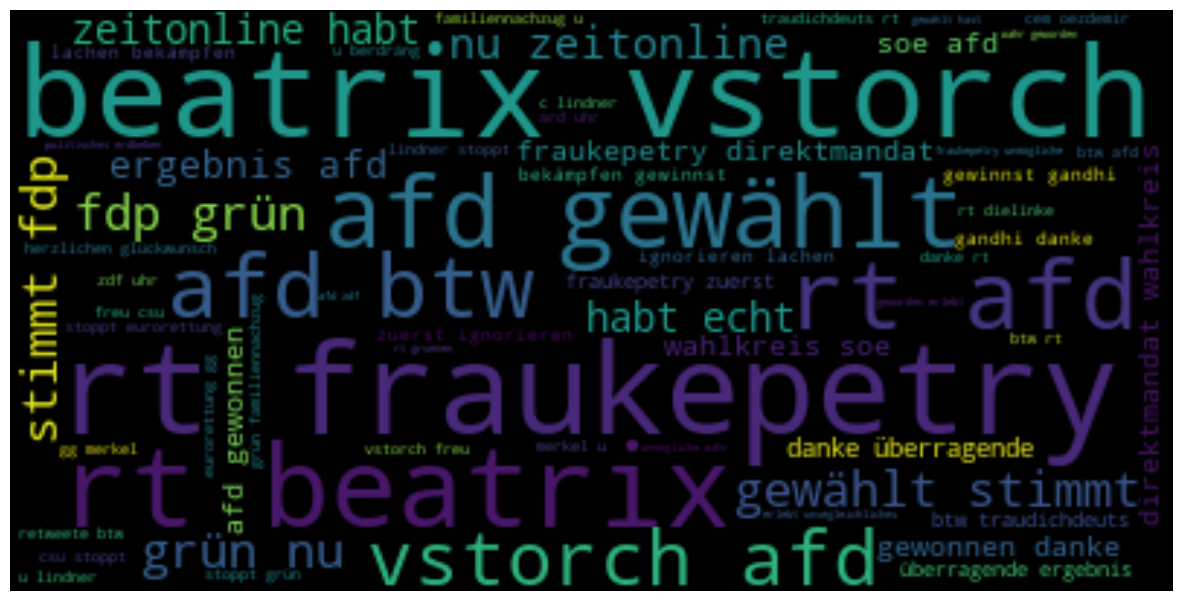

In [19]:
text = words_list

text = re.sub('https', '', text)
text = re.sub('t co', '', text)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Plot the word cloud image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

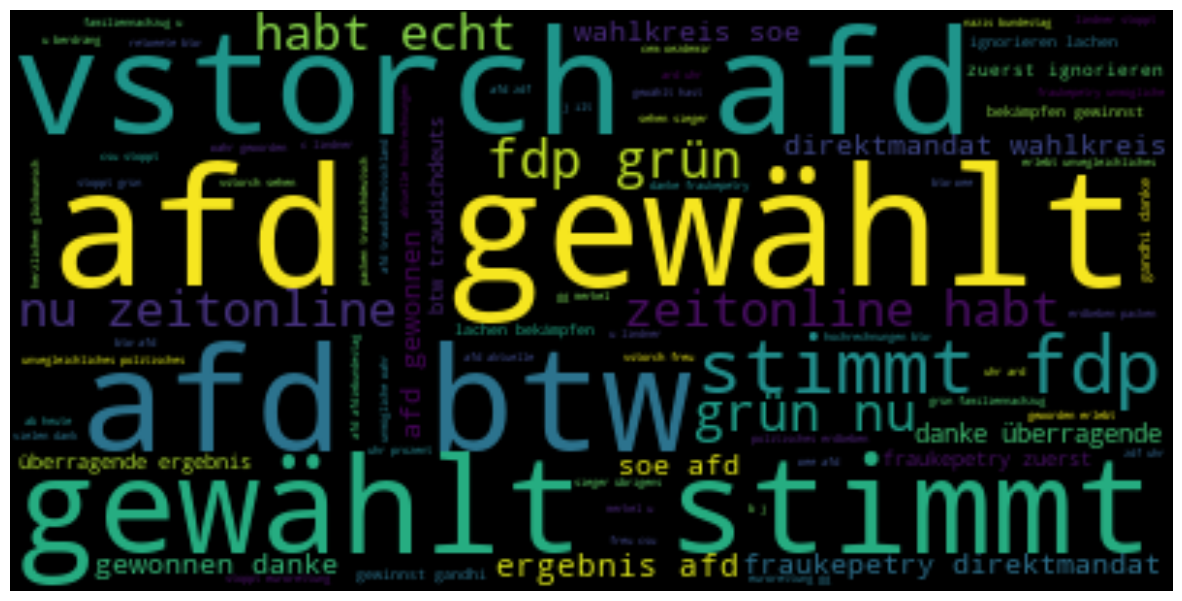

In [20]:
text = words_list

text = re.sub('https', '', text)
text = re.sub('t co', '', text)
text = re.sub('rt', '', text)
text = re.sub('beatrix', '', text)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Plot the word cloud image
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()